# **Загрузка датасета**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive 
drive.mount('/content/gdrive')

data = pd.read_csv('gdrive/My Drive/Colab Notebooks/master.csv')
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# **Изучение датасета**

In [ ]:
# вывод размерности
data.shape

(27820, 12)

In [ ]:
# вывод столбцов
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
# переименование столбцов для удобства
data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
# вывод информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# **Исключение пустых значений**

In [ ]:
data.isnull().any()

country           False
year              False
gender            False
age_group         False
suicide_count     False
population        False
suicide_rate      False
country-year      False
HDI for year       True
gdp_for_year      False
gdp_per_capita    False
generation        False
dtype: bool

In [ ]:
# исключение столбца "индекса человеческого развития", 
# так как треть данных для него отсутствует
data=data.drop(['HDI for year'],axis=1)
# исключение столбца с названием страны и годом, 
# так как эти данные дублируют данные в соответствующих столбцах
data = data.drop(['country-year'],axis=1)

In [ ]:
# проверка на остаточные строки с пустыми значениями

data = data.dropna()

In [ ]:
data.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


# **Визуализация данных**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5da9d80d90>,
      dtype=object)

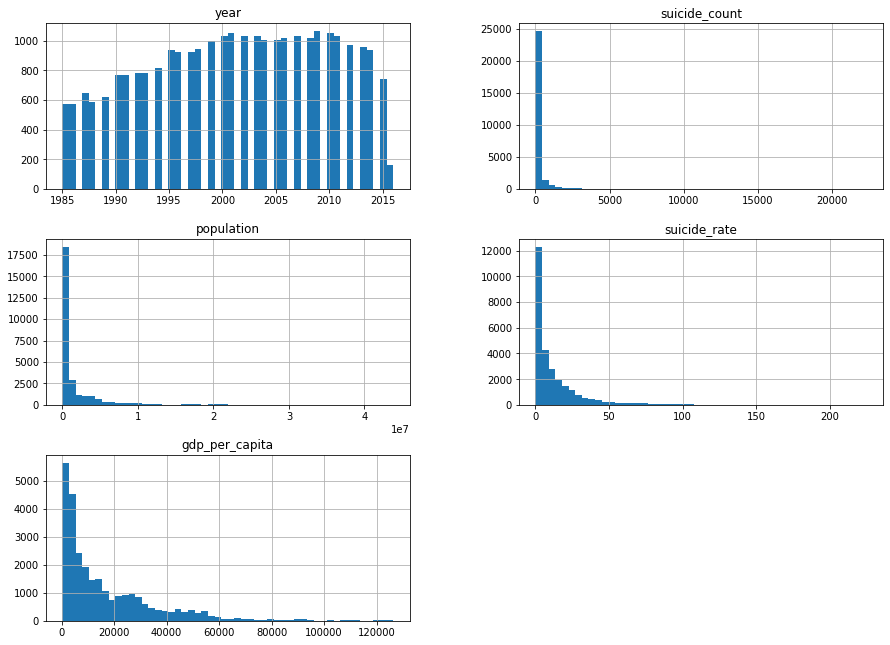

In [ ]:
# вывод графиков каждого из факторов, представленных в цифрах
data.hist(bins = 50,figsize = (15,11))

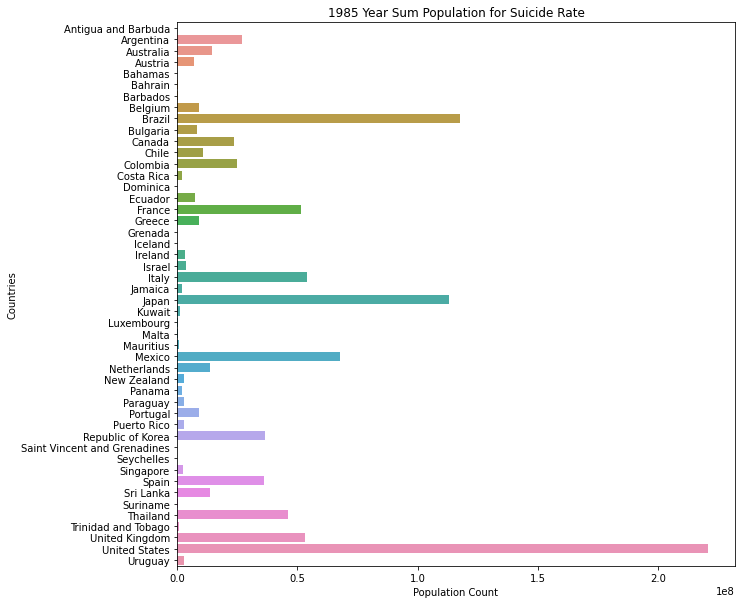

In [ ]:
# вывод графика населения для каждой страны в 1985 году

min_year=min(data.year)
max_year=max(data.year)

data_country=data[(data['year']==min_year)]
country_1985_population=[]

country_1985=data[(data['year']==min_year)].country.unique()

for country in country_1985:
    country_1985_population.append(sum(data_country[(data_country['country']==country)].population)) 

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('1985 Year Sum Population for Suicide Rate')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


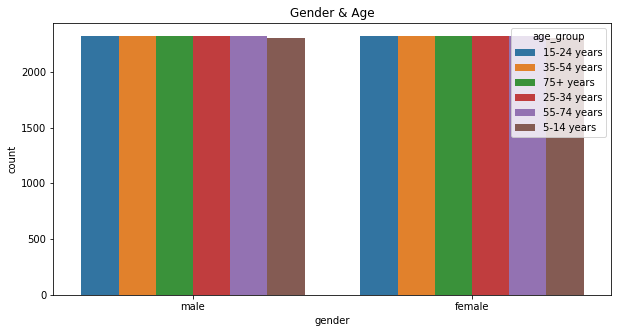

In [ ]:
# вывод графика по гендерам и возрастным группам

data.age_group.value_counts()

plt.figure(figsize=(10,5))
sns.countplot(data.gender,hue=data.age_group)
plt.title('Gender & Age')
plt.show()

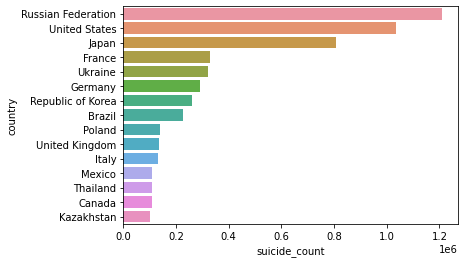

In [ ]:
# вывод сравнительного графика стран по количеству суицидов

suicides_count=[]
for country in data.country.unique():
    suicides_count.append(sum(data[data['country']==country].suicide_count))  

suicides_count=pd.DataFrame(suicides_count,columns=['suicide_count'])
country=pd.DataFrame(data.country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicides_count,country],axis=1)

data_suicide_countr=data_suicide_countr.sort_values(by='suicide_count',ascending=False)

sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicide_count[:15])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


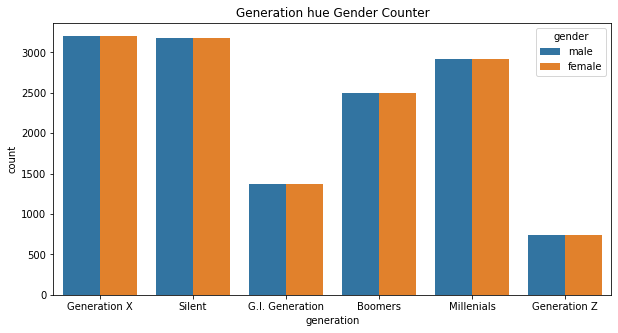

In [ ]:
# вывод соотношения гендеров среди данных за каждое поколение
plt.figure(figsize=(10,5))
sns.countplot(data.generation,hue=data.gender)
plt.title('Generation hue Gender Counter')
plt.show()

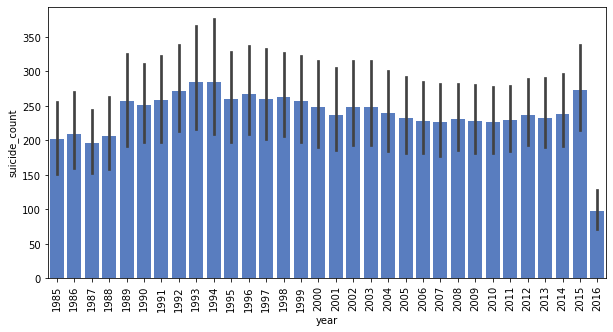

In [ ]:
plt.figure(figsize=(10,5))
sns.set_color_codes("muted")
sns.barplot(x="year", y="suicide_count", data=data,
            label="Year Suicides", color="b")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Generations Count')

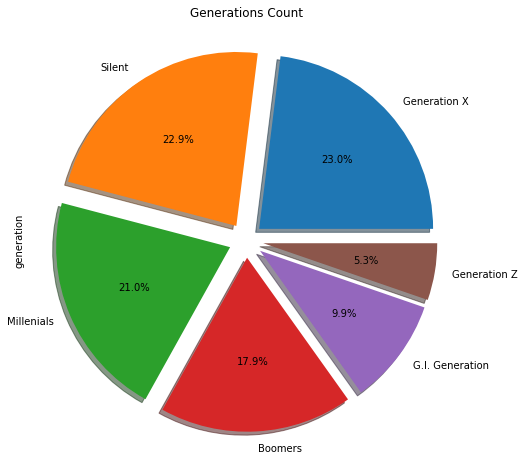

In [ ]:
# вывод соотношения количества людей по поколениям
data['generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],
                                           autopct='%1.1f%%',shadow=True, figsize=(18,8)).set_title('Generations Count')

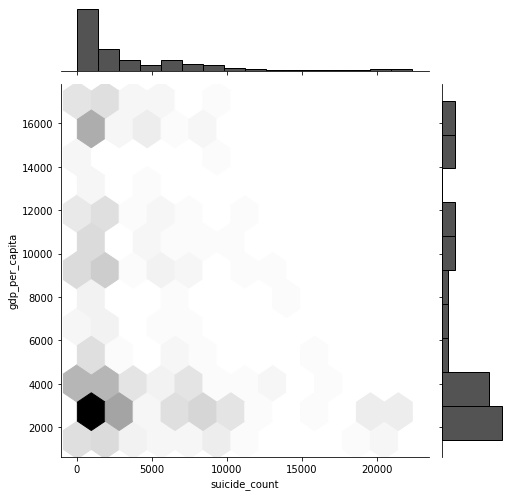

In [ ]:
# вывод соотношения ВВП страны к количеству суицидов
fig=sns.jointplot(y='gdp_per_capita',x='suicide_count',height=7, kind='hex',data=data[data['country']=='Russian Federation'], color="k")

plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


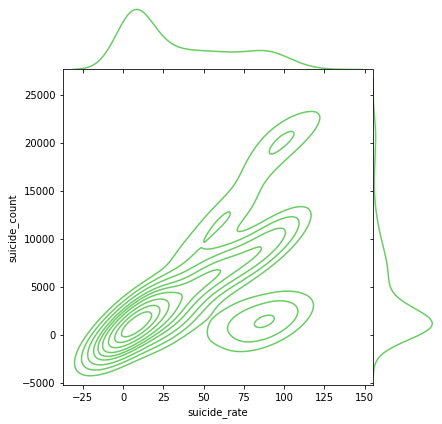

In [ ]:
# вывод соотношения количества суицидов к количеству суицидов на 100 тыс населения
sns.jointplot("suicide_rate", "suicide_count", data=data[data['country']=='Russian Federation'], kind="kde",space=0,color='g')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


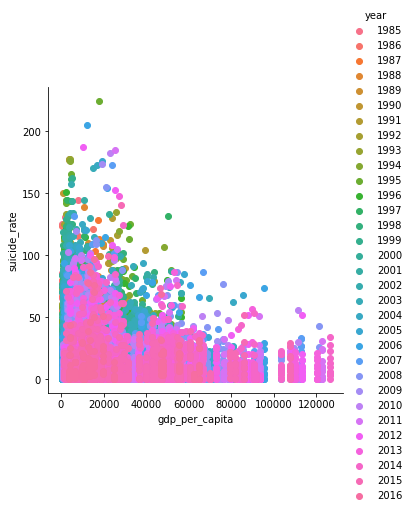

In [ ]:
# вывод соотношения количества суицидов к ВВП в зависимости от года

import matplotlib.pyplot as plt
%matplotlib inline
sns.FacetGrid(data,hue='year',size=5).map(plt.scatter,'gdp_per_capita','suicide_rate').add_legend()
plt.show()

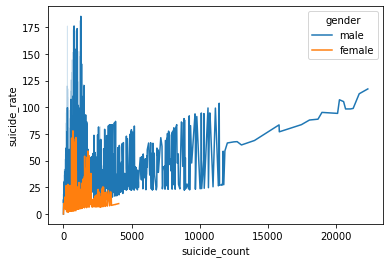

In [ ]:
# вывод гендерного соотношения количества суицидов

sns.lineplot(x="suicide_count", y="suicide_rate",
             hue="gender",data=data.sort_values(by='suicide_rate',ascending=False))
plt.show()

# **Подготовка данных**

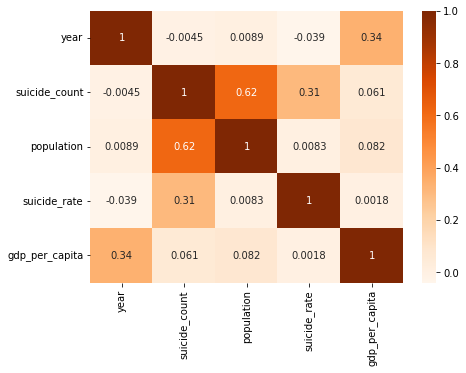

In [ ]:
# построение матрицы корреляции

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

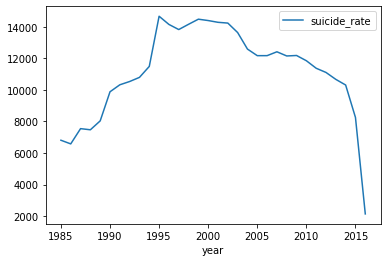

In [ ]:
# вывод зависимости количества суицидов от года

data[['year','suicide_rate']].groupby(['year']).sum().plot()

In [ ]:
# вывод основных характеристик для каждого из факторов

data.describe()

,year,suicide_count,population,suicide_rate,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [ ]:
# исключение выбросов

data=data.sort_values(by=["suicide_rate"])
q1=data["suicide_rate"].quantile(0.25)
q3=data["suicide_rate"].quantile(0.75)
iqr=q3-q1
lwo=q1-1.5*iqr
upo=q3+1.5*iqr
data=data[(data.suicide_rate<upo)&(data.suicide_rate>lwo)]
data=data.sort_index().reset_index(drop=True)
data.shape

(25774, 10)

In [ ]:
# создание копии датасета

stat_data = data.copy()
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
25769,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
25770,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
25771,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
25772,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [ ]:
# конвертирование данных в числовые значения, создание фиктивных переменных

from sklearn.preprocessing import LabelEncoder
import pickle
file = open('label.pkl', 'wb')
categorical = ['country','year','age_group', 'gender', 'generation']
dict= {}

for column in categorical:
    le = LabelEncoder()
    le.fit(stat_data[column])
    # dump information to that file
    dict[column] = le
    stat_data[column] = le.transform(stat_data[column])
pickle.dump(dict, file)
file.close()

file = open('label.pkl', "rb")
label = pickle.load(file)
label

{'country': LabelEncoder(),
 'year': LabelEncoder(),
 'age_group': LabelEncoder(),
 'gender': LabelEncoder(),
 'generation': LabelEncoder()}

In [ ]:
# проверка типа данных

stat_data.dtypes

country             int64
year                int64
gender              int64
age_group           int64
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int64
dtype: object

In [ ]:
# исправление типа данных на float

stat_data['gdp_for_year'] = stat_data['gdp_for_year'].str.replace(',','').astype(float)

In [ ]:
# масштабирование данных

numerical = ['suicide_count', 'population', 'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
stat_data[numerical] = rc.fit_transform(stat_data[numerical])

import pickle
pickle.dump(rc, open('robust.pkl', "wb"))

y = stat_data['suicide_rate']
X = stat_data.drop('suicide_rate',axis=1)
# X.shape, y.shape

stat_data


,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,0.009709,-0.090905,6.71,-0.181418,-0.399097,2
1,0,2,1,2,-0.038835,-0.094379,5.19,-0.181418,-0.399097,5
2,0,2,0,0,-0.058252,-0.107354,4.83,-0.181418,-0.399097,2
3,0,2,1,5,-0.184466,-0.297294,4.59,-0.181418,-0.399097,1
4,0,2,1,1,-0.106796,-0.118272,3.28,-0.181418,-0.399097,0
...,...,...,...,...,...,...,...,...,...,...
25769,100,29,0,2,0.844660,2.254407,2.96,0.059024,-0.329370,2
25770,100,29,0,5,-0.106796,-0.065690,2.58,0.059024,-0.329370,5
25771,100,29,1,3,0.388350,1.645610,2.17,0.059024,-0.329370,3
25772,100,29,0,3,0.233010,1.553045,1.67,0.059024,-0.329370,3


In [ ]:
# разделение датасета на датасеты для обучения и теста в отношении 80-20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((20619, 9), (5155, 9))

# **Прогнозирование с помощью многослойного персептрона**

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100, 100])

In [ ]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
# оценка модели

from sklearn.metrics import mean_squared_error

acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

# вычисление среднеквадратичной ошибки
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Точность данных для обучения: {:.3f}".format(acc_train_mlp))
print("Точность данных для тестирования: {:.3f}".format(acc_test_mlp))
print('\nСреднеквадратичное отклонение тренировочного набора данных: ', rmse_train_mlp)
print('Среднеквадратичное отклонение тестового набора данных: ', rmse_test_mlp)

Точность данных для обучения: 0.876
Точность данных для тестирования: 0.884

Среднеквадратичное отклонение тренировочного набора данных:  3.401539000691992
Среднеквадратичное отклонение тестового набора данных:  3.198927134933559


Text(0.5, 1.0, 'Actual vs Predicted Training Set')

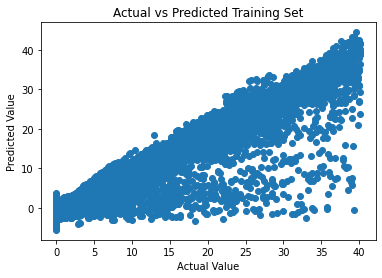

In [ ]:
plt.scatter(y_train,y_train_mlp)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Training Set")